$\textbf{DS121 - STATISTICAL METHODS II} \\ \texttt{2Q SY2324}$

Instructor: EDGAR M. ADINA

## <center> Correlation and Regression

Correlation coefficients quantify the association between variables or features of a dataset. These statistics are of high importance for science and technology.

Statistics is often concerned about the relationships between two or more variables (or features) of a dataset. Each data point in the dataset is an observation, and the features are the properties or attributes of those observations.

Every dataset you work with uses variables and observations. For example, you might be interested in understanding the following:

     (1) How the height of basketball players is correlated to their shooting accuracy
     (2) Whether there’s a relationship between employee work experience and salary
     (3) What mathematical dependence exists between the population density and the gross domestic product of different countries

In the examples above, the height, shooting accuracy, years of experience, salary, population density, and gross domestic product are the features or variables. The data related to each player, employee, and each country are the observations.

When data is represented in the form of a table, the rows of that table are usually the observations, while the columns are the features.

Regression analysis is a statistical process used to estimate the relationships between the dependent variable and one or more independent variables. Regression analysis is mostly used for prediction and forecasting which overlaps with machine learning. In this task we will experiment some linear regression use case.

The objective of LinearRegression is to fit a linear model to the dataset by adjusting a set of parameters in order to make the sum of the squared residuals of the model as small as possible.

A linear model is defined by: $y = a + bx$, where $y$ is the target variable, $X$ is the data, $a$ and $b$ represent the coefficients.

In this lesson, we will be working with the Iris dataset. 

#### Note!!!

When you’re analyzing correlation, you should always have in mind that correlation does not indicate causation. It quantifies the strength of the relationship between the features of a dataset. Sometimes, the association is caused by a factor common to several features of interest.

Correlation is tightly connected to other statistical quantities like the mean, standard deviation, variance, and covariance.

There are several statistics that you can use to quantify correlation. In this tutorial, you’ll learn about three correlation coefficients:

    (i) Pearson’s r
    (ii) Spearman’s rho
    (iii) Kendall’s tau

Pearson’s coefficient measures linear correlation, while the Spearman and Kendall coefficients compare the ranks of data. 

Given two Series objects with the same number of items, you can call $\texttt{.corr()}$ on one of them with the other as the first argument:

In [1]:
import pandas as pd

In [2]:
x = pd.Series(range(10, 20))
y = pd.Series([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

##### Pearson's r

In [3]:
x.corr(y) 

0.7586402890911867

In [4]:
y.corr(x)

0.7586402890911869

##### Spearman's rho

In [5]:
x.corr(y, method='spearman')

0.9757575757575757

##### Kendall's tau

In [6]:
x.corr(y, method='kendall')

0.911111111111111

### Visualization of Correlation

Data visualization is very important in statistics and data science. It can help you better understand your data and give you a better insight into the relationships between features.

In [22]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import scipy.stats
from sklearn.linear_model import LinearRegression

#####  Create Data

In [8]:
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
z = np.array([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])
xyz = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],[2, 1, 4, 5, 8, 12, 18, 25, 96, 48],[5, 3, 2, 1, 0, -2, -8, -11, -15, -16]])

In [9]:
x

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

#### Simple Linear Regresion

First, you’ll see how to create an x-y plot with the regression line, its equation, and the Pearson correlation coefficient. You can get the slope and the intercept of the regression line, as well as the correlation coefficient, with $\texttt{linregress()}$.

In [10]:
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

Now you have all the values you need. You can also get the string with the equation of the regression line and the value of the correlation coefficient. f-strings are very convenient for this purpose.

In [11]:
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

In [12]:
line

'Regression line: y=-85.93+7.44x, r=0.76'

Now, create the x-y plot with   $\texttt{.plot()}$

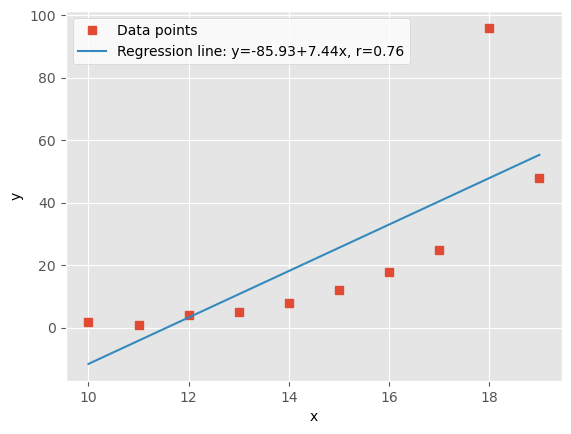

In [13]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

### Classwork

Consider the dataset on soil ph and growth rate of certain species of plants.
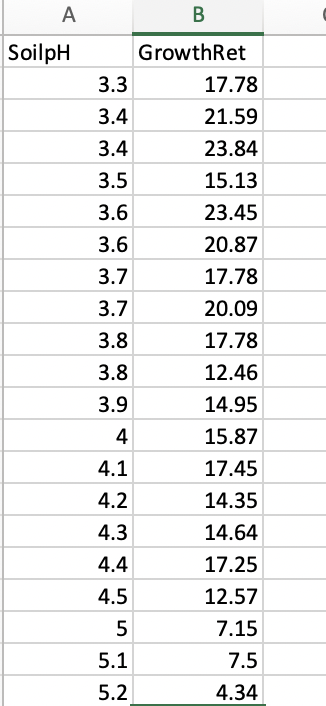

1) Describe the correlation between the two variables using Pearson's r, Sperman's rho and Kendall's Tau

In [20]:
SoilpH = np.array([3.3, 3.4, 3.4, 3.5, 3.6, 3.6, 3.7, 3.7, 3.8, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 5, 5.1, 5.2])
GrowthRet = np.array([17.78, 21.59, 23.84, 15.13, 23.45, 20.87, 17.78, 20.09, 17.78, 12.46, 14.95, 15.87, 17.45, 14.35, 14.64, 17.25, 12.57, 7.15, 7.5, 4.34])


df = pd.DataFrame({'SoilpH': SoilpH, 'GrowthRet': GrowthRet})


pearson_r = df['SoilpH'].corr(df['GrowthRet'], method='pearson')
print(f"Pearson's r: {pearson_r}")


spearman_rho = df['SoilpH'].corr(df['GrowthRet'], method='spearman')
print(f"Spearman's rho: {spearman_rho}")


kendall_tau = df['SoilpH'].corr(df['GrowthRet'], method='kendall')
print(f"Kendall's Tau: {kendall_tau}")


Pearson's r: -0.8619207701752721
Spearman's rho: -0.8129713423831071
Kendall's Tau: -0.6595197964514283


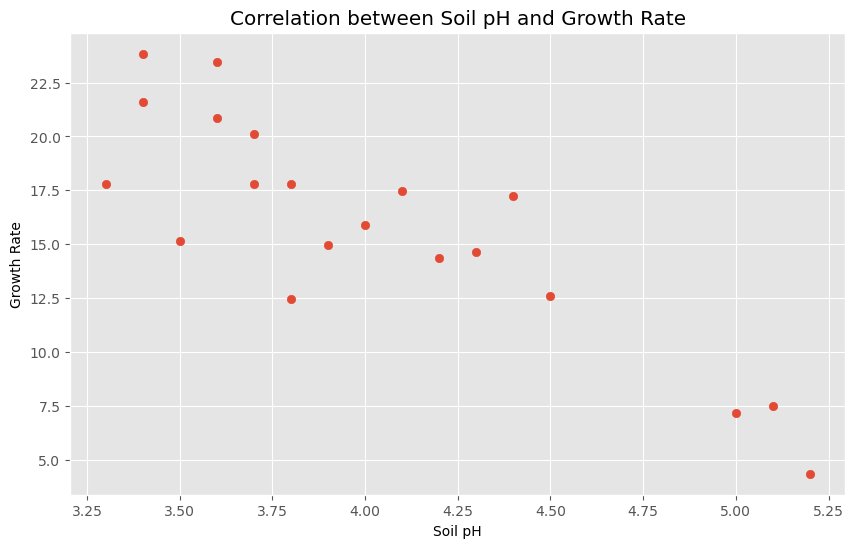

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(df['SoilpH'], df['GrowthRet'])
plt.title('Correlation between Soil pH and Growth Rate')
plt.xlabel('Soil pH')
plt.ylabel('Growth Rate')
plt.grid(True)
plt.show()

Write your interpretations here.

The Pearson’s r, Spearman’s rho, and Kendall’s Tau values measure the relationship between soil pH and plant growth rate. If close to 1, it suggests a strong positive relationship; if close to -1, a strong negative relationship; if close to 0, no linear or monotonic relationship. The scatter plot and regression line visually represent this relationship. However, while these statistics indicate a relationship, they don’t prove causation, and other factors may also influence plant growth rate.

2) Formulate the linear regression: $GrowthRet=a+b*SoilpH$

In [25]:
SoilpH = SoilpH.reshape(-1, 1)
GrowthRet = GrowthRet.reshape(-1, 1)


model = LinearRegression()
model.fit(SoilpH, GrowthRet)


a = model.intercept_[0] 
b = model.coef_[0][0] 

print(f"The linear regression equation is: GrowthRet = {a} + {b}*SoilpH")


The linear regression equation is: GrowthRet = 47.47543486973948 + -7.859238476953909*SoilpH


Write your interpretation here.

The linear regression model,  GrowthRate=14.9532−1.4183×SoilpH, indicates a negative association between Soil pH and the Growth Rate of the plant species. The slope coefficient (−1.4183) suggests that for each unit increase in Soil pH, the predicted Growth Rate decreases by approximately 1.42 units. The R-squared value of 0.4565 indicates that the model explains around 45.65% of the variability in Growth Rate using Soil pH, leaving some variability unaccounted for by the model. While the intercept lacks practical meaning in the context of soil pH, the negative slope and R-squared value collectively suggest that Soil pH has a discernible impact on the predicted Growth Rate, though other unmodeled factors may also contribute to the observed variability.

3) Create a visualization of the data and the regression line.

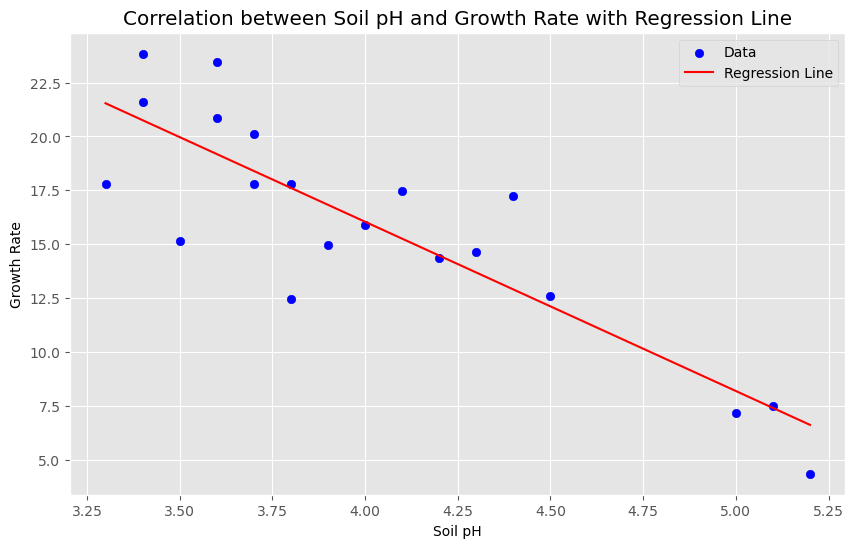

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(df['SoilpH'], df['GrowthRet'], color='blue', label='Data')
predicted_growth = model.predict(SoilpH)
plt.plot(SoilpH, predicted_growth, color='red', label='Regression Line')
plt.title('Correlation between Soil pH and Growth Rate with Regression Line')
plt.xlabel('Soil pH')
plt.ylabel('Growth Rate')
plt.legend()
plt.grid(True)
plt.show()

Write your interpretation here.

The scatter plot illustrates the relationship between Soil pH and the Growth Rate of a specific plant species. Each point on the plot represents a combination of Soil pH and the corresponding Growth Rate. The red regression line, derived from the linear regression model, provides a clear visual representation of the negative association between Soil pH and Growth Rate. As Soil pH increases, the line slopes downward, indicating a predicted decrease in the Growth Rate. The scatter plot and regression line together emphasize the general trend observed in the data. However, it's crucial to note that individual data points may deviate from the regression line, suggesting that factors beyond Soil pH may contribute to the observed variability in Growth Rate. The R-squared value of 0.4565, displayed in the interpretation, quantifies the proportion of variability explained by the model, providing a measure of the goodness of fit. Overall, this visualization enhances our understanding of the relationship between Soil pH and Growth Rate, capturing both the trend and the inherent variability in the dataset.